## Data Wrangling 

## Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_img = pd.read_csv("image-predictions.tsv",sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing

### twitter-archive-enhanced.csv

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
df.shape

(2356, 17)

### image-predictions.tsv

In [7]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [9]:
df_img.shape

(2075, 12)

## Cleaning

In [10]:
df_clean = df.copy()

In [11]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#rating_denominator column has values other than 10
#values other than 10 were removed
df_clean = df_clean[df_clean.rating_denominator == 10]
df_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [13]:
#dog names in name column have (none, the, an, a, this, None) as values
#values which do not start with a capital letter or were None have been removed
df_clean = df_clean[df_clean['name'].str.contains('^[A-Z]+')]
df_clean = df_clean[df_clean['name'] != 'None']
df_clean.shape

(1499, 17)

In [14]:
#there are 181 different retweets which are not original rog ratings
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [15]:
#(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
#...columns should be dropped after removing the retweets
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [16]:
#there are 78 replies to original dog rating tweets
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

In [17]:
#(in_reply_to _status, in_reply_to_user_id) columns should be dropped after the replies are removed
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1387 non-null int64
timestamp             1387 non-null object
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1387 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
doggo                 1387 non-null object
floofer               1387 non-null object
pupper                1387 non-null object
puppo                 1387 non-null object
dtypes: int64(3), object(9)
memory usage: 140.9+ KB


In [19]:
#timestamp is a string not datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1387 non-null int64
timestamp             1387 non-null datetime64[ns, UTC]
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1387 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
doggo                 1387 non-null object
floofer               1387 non-null object
pupper                1387 non-null object
puppo                 1387 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 140.9+ KB


## Tidying

In [21]:
#timestamp consists of one column only (date + time) and not two separate columns
df_clean['date'] = pd.to_datetime(df_clean['timestamp']).dt.date
df_clean['time'] = pd.to_datetime(df_clean['timestamp']).dt.time

date_col = df_clean.pop('date')
time_col = df_clean.pop('time')

df_clean.insert(2, 'date', date_col)
df_clean.insert(3, 'time', time_col)

df_clean = df_clean.drop(['timestamp'], axis=1)

In [22]:
#source column is not informative
df_clean = df_clean.drop(['source'], axis=1)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1387 non-null int64
date                  1387 non-null object
time                  1387 non-null object
text                  1387 non-null object
expanded_urls         1387 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
doggo                 1387 non-null object
floofer               1387 non-null object
pupper                1387 non-null object
puppo                 1387 non-null object
dtypes: int64(3), object(9)
memory usage: 140.9+ KB


In [24]:
# twitter-archive-enhanced.csv and image-predictions.tsv are not merged together in one dataframe or csv file
#new_df = pd.concat([df_clean, df_img], axis=1)
df_merged = pd.merge(df_clean, df_img, on='tweet_id')
df_merged.shape

(1346, 23)

In [25]:
df_merged.to_csv('twitter_archive_master.csv', index = False)

## Visualization

In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 23 columns):
tweet_id              1346 non-null int64
date                  1346 non-null object
time                  1346 non-null object
text                  1346 non-null object
expanded_urls         1346 non-null object
rating_numerator      1346 non-null int64
rating_denominator    1346 non-null int64
name                  1346 non-null object
doggo                 1346 non-null object
floofer               1346 non-null object
pupper                1346 non-null object
puppo                 1346 non-null object
jpg_url               1346 non-null object
img_num               1346 non-null int64
p1                    1346 non-null object
p1_conf               1346 non-null float64
p1_dog                1346 non-null bool
p2                    1346 non-null object
p2_conf               1346 non-null float64
p2_dog                1346 non-null bool
p3                    1346 non-null obj

In [27]:
#insight
#most common dog name
print('Most common dog name is: ' + df_merged.name.value_counts().idxmax())
print('Number of dogs: ' + str(df_merged.name.value_counts().max()))

Most common dog name is: Charlie
Number of dogs: 11


In [28]:
print('Highest number of tweets: ' + str(df_merged.date.value_counts().max()))
print('Tweeted on: ' + str(df_merged.date.value_counts().idxmax()))

Highest number of tweets: 18
Tweeted on: 2015-11-28


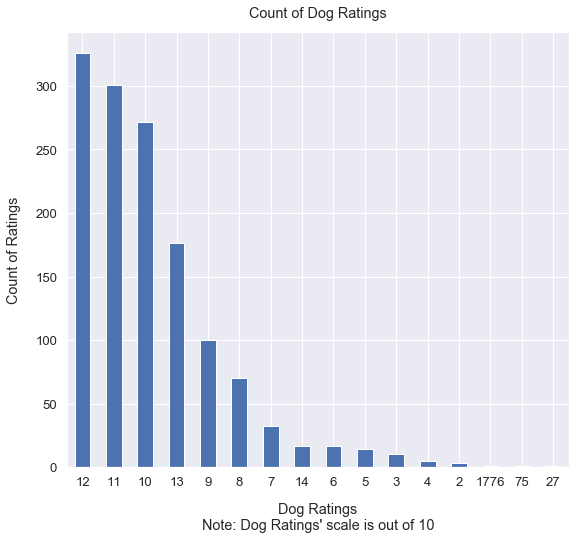

In [29]:
sns.set(font_scale=1.2)
df_merged.rating_numerator.value_counts().plot(kind='bar', figsize=(9, 8), rot=0);
plt.xlabel('''Dog Ratings
Note: Dog Ratings' scale is out of 10''', labelpad=14)
           
plt.ylabel("Count of Ratings", labelpad=14)
plt.title("Count of Dog Ratings", y=1.02);

plt.savefig('dog_ratings' + '.png')
